# **BigMart Sales**

1. **Mô tả**:

- Bigmart Sales là một bộ dữ liệu bao gồm các ghi chép giao dịch của một cửa hàng bán lẻ. Đây là một bài toán hồi quy, nơi chúng ta cần dự đoán doanh số bán hàng của một cửa hàng dựa trên các biến số khác nhau. Bộ dữ liệu có tổng cộng 8523 dòng và 12 biến.

2. **Ứng dụng**:

- Ngành bán lẻ sử dụng phân tích dữ liệu để tối ưu hóa các quy trình kinh doanh như:

    + Sắp xếp sản phẩm
    + Quản lý hàng tồn kho
    + Đề xuất các chương trình khuyến mãi tùy chỉnh
    + Đóng gói sản phẩm

3. **Vấn đề cần giải quyết**:

- Phân tích dữ liệu chuẩn bị cho việc dự đoán doanh số bán hàng của một cửa hàng.

> Thông Tin Các Cột Dữ Liệu (dataset: ``bigmart_data.csv``)

| Tên Cột                     | Mô Tả                                                   |
|-----------------------------|---------------------------------------------------------|
| **Item_Identifier**         | Mã sản phẩm duy nhất                                    |
| **Item_Weight**             | Trọng lượng của sản phẩm                                |
| **Item_Fat_Content**        | Kiểm tra nồng độ chất béo trong sản phẩm                |
| **Item_Visibility**         | % diện tích trưng bày của tất cả sản phẩm tương tự trong cửa hàng |
| **Item_Type**               | Danh mục sản phẩm                                       |
| **Item_MRP**                | Giá bán lẻ tối đa của sản phẩm                          |
| **Outlet_Identifier**       | Mã cửa hàng                                             |
| **Outlet_Establishment_Year** | Năm thành lập cửa hàng                                 |
| **Outlet_Size**             | Kích thước của cửa hàng (Danh mục kích thước diện tích) |
| **Outlet_Location_Type**    | Theo cấp độ thành phố (Kích thước)                      |
| **Outlet_Type**             | Cửa hàng tạp hóa hoặc loại siêu thị                     |
| **Item_Outlet_Sales**       | Doanh số bán sản phẩm tại cửa hàng cụ thể               |


## **THỰC HÀNH VÀ ỨNG DỤNG**

- Import Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### **A. Áp Dụng Kiến Thức Pandas**
- Thực hành Đọc dữ liệu với file `.csv` 
- CSV là viết tắt của Comma Separated Value - là những giá trị được phân tách bằng dấu phẩy và là tệp văn bản thuần túy chứa dữ liệu. Nó được biết đến như một trong những định dạng lưu trữ dữ liệu đơn giản nhất và được Data Scientist và Data Engineer thường xuyên sử dụng. 

#### Loading and Inspecting Data

In [2]:
mart = pd.read_csv('./dataset/bigmart_data.csv')
mart.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


##### Giải thích:

- ``pd.read_csv('./dataset/bigmart_data.csv')``: Sử dụng hàm read_csv của thư viện pandas để đọc dữ liệu từ file CSV có tên 'bigmart_data.csv' và lưu vào biến mart.
- ``mart.head(10)``: Hiển thị 10 dòng đầu tiên của DataFrame mart để xem qua cấu trúc và một phần dữ liệu của file CSV đã được đọc.

In [3]:
mart.shape

(8523, 12)

##### Giải thích:

- ``mart.shape``: Trả về một tuple thể hiện kích thước của DataFrame mart, với số hàng và số cột tương ứng.

In [4]:
mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### Giải thích:

- ``mart.columns``: Trả về danh sách các tên cột của DataFrame mart

In [5]:
mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Giải thích:

- ``mart.info()``: Hiển thị thông tin tóm tắt về DataFrame mart, bao gồm:
    - Tổng số lượng hàng (entries).
    - Tên các cột.
    - Số lượng giá trị không rỗng (non-null) trong mỗi cột.
    - Kiểu dữ liệu của mỗi cột (e.g., int64, float64, object).
    - Dung lượng bộ nhớ mà DataFrame chiếm dụng.

### **B. Áp Dụng Kiến Thức Numpy**

#### 1. Basic Numpy Operations

In [6]:
item_weight = mart['Item_Weight'].to_numpy()

mean_weight = np.nanmean(item_weight)
median_weight = np.nanmedian(item_weight) 
std_weight = np.nanstd(item_weight) 

print("Mean Weight:", mean_weight)
print("Median Weight:", median_weight)
print("Standard Deviation of Weight:", std_weight)

Mean Weight: 12.857645184135976
Median Weight: 12.6
Standard Deviation of Weight: 4.643127630847946


##### Giải thích:

- `to_numpy()`: Chuyển đổi cột 'Item_Weight' thành mảng numpy.
- `np.nanmean()`: Tính giá trị trung bình của mảng, bỏ qua các giá trị NaN.
- `np.nanmedian()`: Tính giá trị trung vị của mảng, bỏ qua các giá trị NaN.
- `np.nanstd()`: Tính độ lệch chuẩn của mảng, bỏ qua các giá trị NaN.

#### 2. Handling Missing Values

In [7]:
# Kiểm tra các giá trị thiếu trong 'Item_Weight'
missing_values = np.isnan(item_weight).sum()  # Đếm số lượng giá trị NaN trong mảng
print("Number of missing values in 'Item_Weight':", missing_values)

# Điền các giá trị thiếu bằng giá trị trung bình (không thay đổi dữ liệu hiện có)
item_weight_filled = np.where(np.isnan(item_weight), mean_weight, item_weight)
print("Missing values filled with mean.")

Number of missing values in 'Item_Weight': 1463
Missing values filled with mean.


##### Giải thích:

- ``np.isnan()``: Kiểm tra các giá trị NaN trong mảng.
- ``np.where()``: Thay thế các giá trị NaN trong mảng bằng giá trị trung bình đã tính được.

#### 3. Data Transformation

In [8]:
# Biến đổi log của 'Item_MRP'
item_mrp = mart['Item_MRP'].to_numpy()
log_item_mrp = np.log(item_mrp)

# Hiển thị dữ liệu đã biến đổi
print("Original MRP:", item_mrp[:5])
print("Log Transformed MRP:", log_item_mrp[:5])

Original MRP: [249.8092  48.2692 141.618  182.095   53.8614]
Log Transformed MRP: [5.52069743 3.87679368 4.95313329 5.20452853 3.98641408]


##### Giải thích:

- ``np.log()``: Áp dụng phép biến đổi log tự nhiên cho các giá trị trong mảng.

#### 4. Data Aggregation

In [9]:
# Tổng hợp 'Item_Outlet_Sales' theo 'Item_Type'
item_type_sales = mart.groupby('Item_Type')['Item_Outlet_Sales'].sum().to_numpy()

# Hiển thị dữ liệu tổng hợp
print("Sales by Item Type:", item_type_sales)

Sales by Item Type: [1265525.3422  553237.1888  232298.9516 1444151.4926 1522594.0512
 1825734.7886 2820059.8168  457793.4272 1045200.1378 2055493.7132
  917565.612   325517.6096  148868.2194 2732786.087   892897.722
  351401.2504]


##### Giải thích:

- ``groupby()``: Nhóm dữ liệu theo 'Item_Type'.
- ``sum()``: Tính tổng doanh số bán hàng cho từng loại sản phẩm.
- ``to_numpy()``: Chuyển đổi kết quả thành mảng numpy.

#### 5. Data Normalization

In [10]:
# Chuẩn hóa Min-Max của 'Item_Visibility'
item_visibility = mart['Item_Visibility'].to_numpy()
min_visibility = np.min(item_visibility)
max_visibility = np.max(item_visibility)

normalized_visibility = (item_visibility - min_visibility) / (max_visibility - min_visibility)
print("Normalized Visibility:", normalized_visibility[:5])

Normalized Visibility: [0.04886645 0.05870508 0.05103696 0.         0.        ]


##### Giải thích:

- ``np.min()``: Tìm giá trị nhỏ nhất trong mảng.
- ``np.max()``: Tìm giá trị lớn nhất trong mảng.
- Biểu thức (``item_visibility`` - ``min_visibility``) / (``max_visibility`` - ``min_visibility``): Áp dụng chuẩn hóa Min-Max cho các giá trị trong mảng.

### **C. Thực Hiện Làm Sạch Dữ Liệu - Data Cleaning**

In [11]:
# Kiểm tra các giá trị bị thiếu
mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Giải thích:

- ``mart.isnull().sum()``: Kiểm tra và đếm số lượng giá trị bị thiếu (NaN) trong mỗi cột của DataFrame mart.

In [12]:
# Tính phần trăm các giá trị bị thiếu so với tổng số dữ liệu
mart.isnull().sum() / len(mart) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

##### Giải thích:

- ``mart.isnull().sum() / len(mart) * 100``: Tính phần trăm các giá trị bị thiếu so với tổng số dòng dữ liệu trong DataFrame mart.
- Từ output trả về, ta có: ~17% giá trị Item_Weight + ~28% giá trị thiếu Outlet_Size.

In [13]:
# Thống kê các giá trị thiếu của cột 'Item_Weight'
mart.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

##### Giải thích:

- ``mart.Item_Weight.describe()``: Hiển thị các thống kê mô tả cơ bản (như số lượng, giá trị trung bình, độ lệch chuẩn, giá trị min, max, các phần tư) cho cột 'Item_Weight'.

In [14]:
# Điền các giá trị thiếu trong cột 'Item_Weight' bằng giá trị trung bình của cột này
mart['Item_Weight'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())

##### Giải thích:

- ``mart['Item_Weight'] = mart['Item_Weight'].fillna(mart['Item_Weight'].mean())``: Điền các giá trị thiếu trong cột 'Item_Weight' bằng giá trị trung bình của cột và cập nhật trực tiếp vào DataFrame mart.

In [15]:
# Thống kê các giá trị của cột 'Outlet_Size'
mart.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

##### Giải thích:

- ``mart.Outlet_Size.value_counts()``: Đếm số lượng các giá trị duy nhất trong cột 'Outlet_Size'.

In [16]:
# Điền các giá trị thiếu trong cột 'Outlet_Size' bằng giá trị 'Medium'
mart['Outlet_Size'] = mart['Outlet_Size'].fillna('Medium')

##### Giải thích:

- ``mart['Outlet_Size'] = mart['Outlet_Size'].fillna('Medium')``: Điền các giá trị thiếu trong cột 'Outlet_Size' bằng giá trị 'Medium' và cập nhật trực tiếp vào DataFrame mart.

In [17]:
# Xác minh các giá trị bị thiếu đã được xử lý
mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##### Giải thích:

- ``mart.isnull().sum()``: Kiểm tra và đếm lại số lượng giá trị bị thiếu trong mỗi cột của DataFrame mart sau khi đã xử lý các giá trị bị thiếu.

### **D. Áp Dụng Kiến Thức Matplotlib - Data Visualization**

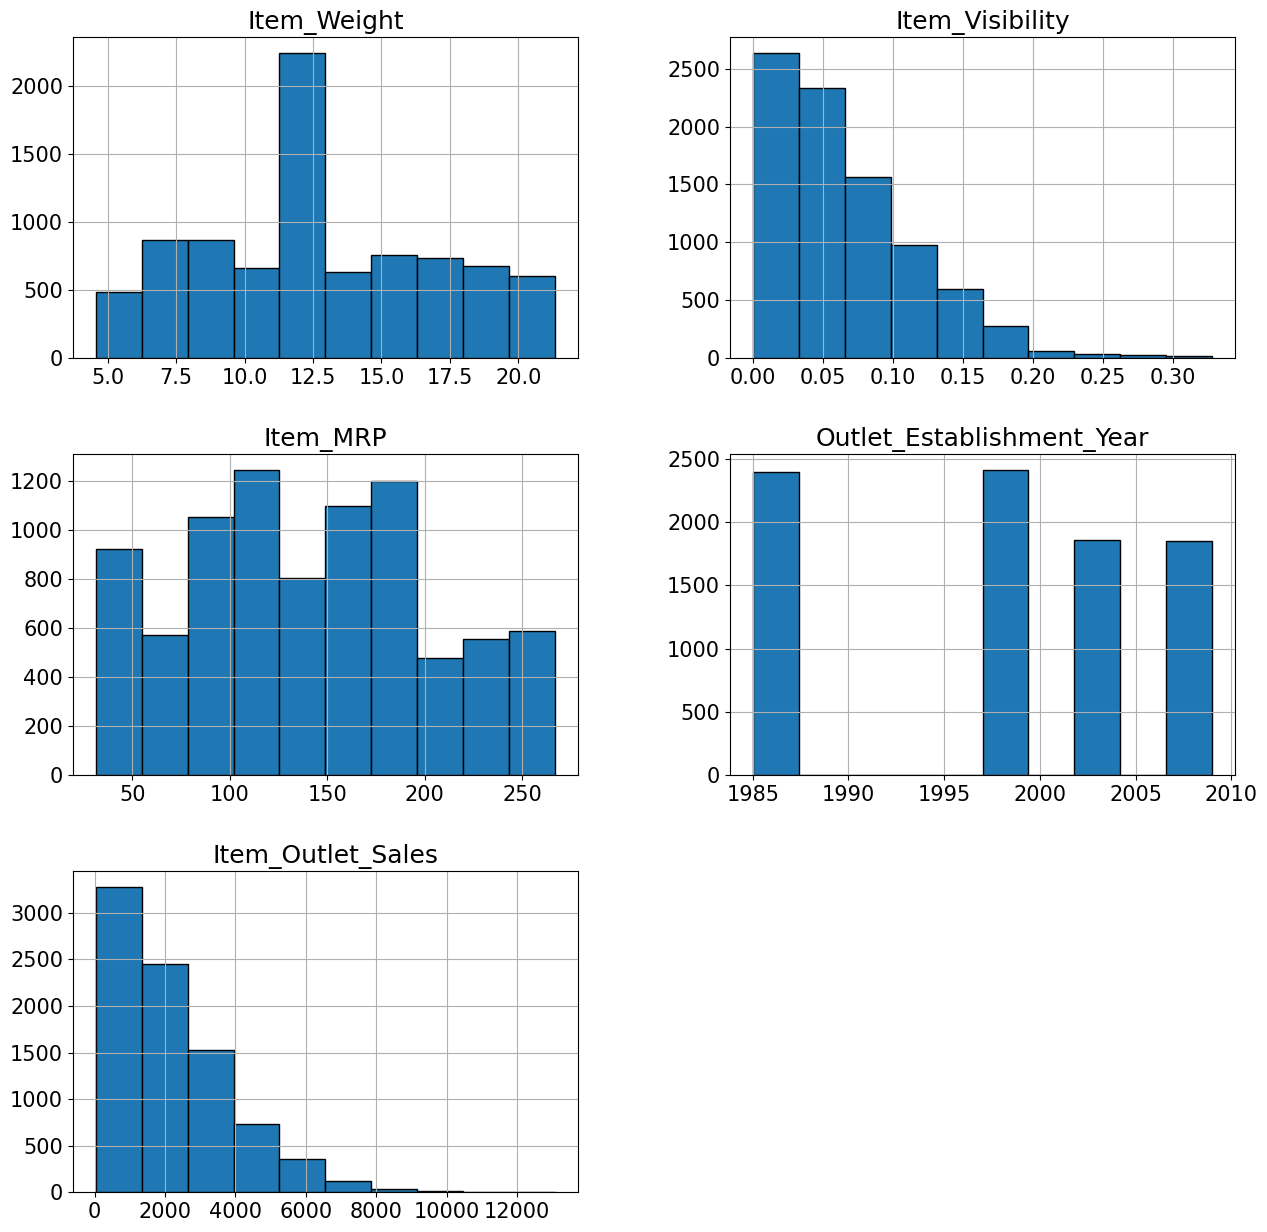

In [18]:
# Thiết lập môi trường vẽ biểu đồ
%matplotlib inline
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (10, 10)
matplotlib.rcParams['font.size'] = 15

# Vẽ biểu đồ histogram cho toàn bộ các cột trong dataset
mart.hist(figsize=(15, 15), edgecolor='black')
plt.show()

##### Giải thích:

- ``%matplotlib inline``: Thiết lập để hiển thị các biểu đồ trực tiếp trong notebook.
- ``matplotlib.rcParams['figure.figsize'] = (10, 10)``: Thiết lập kích thước mặc định của các biểu đồ là 10x10 inch.
- ``matplotlib.rcParams['font.size'] = 15``: Thiết lập kích thước font chữ mặc định là 15.
- ``mart.hist(figsize=(15, 15), edgecolor='black')``: Vẽ biểu đồ histogram cho toàn bộ các cột trong dataset, với kích thước 15x15 inch và cạnh màu đen.

#### 1. Biểu Đồ Phân Phối Trọng Lượng Sản Phẩm (Item Weight Distribution)

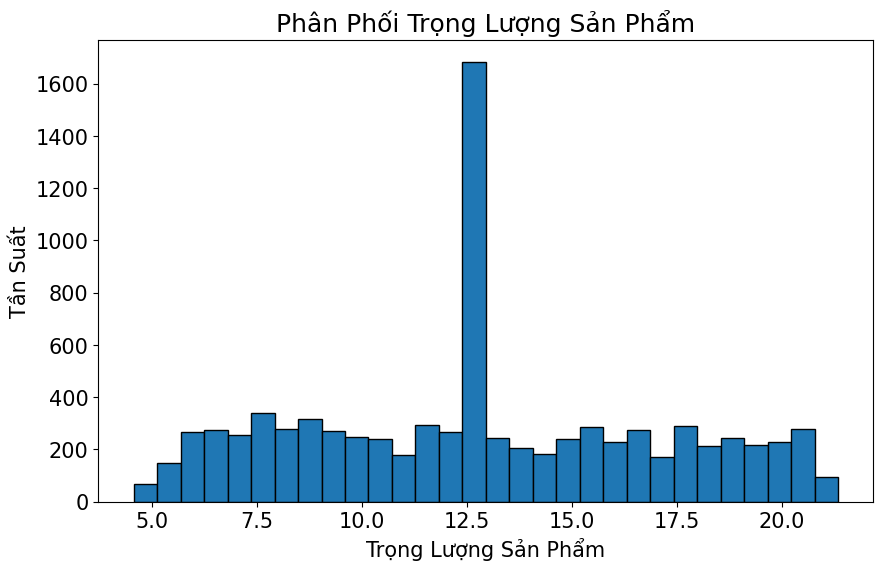

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(mart['Item_Weight'].dropna(), bins=30, edgecolor='black')
plt.title('Phân Phối Trọng Lượng Sản Phẩm')
plt.xlabel('Trọng Lượng Sản Phẩm')
plt.ylabel('Tần Suất')
plt.show()

##### Giải thích:

- ``plt.hist()``: Vẽ biểu đồ histogram cho cột 'Item_Weight', bỏ qua các giá trị NaN.
- ``plt.title()``, ``plt.xlabel()``, ``plt.ylabel()``: Thiết lập tiêu đề và nhãn cho các trục.

#### 2. Biểu Đồ Box Plot Cho Doanh Số Bán Hàng Theo Loại Sản Phẩm (Item Type)

<Figure size 1200x800 with 0 Axes>

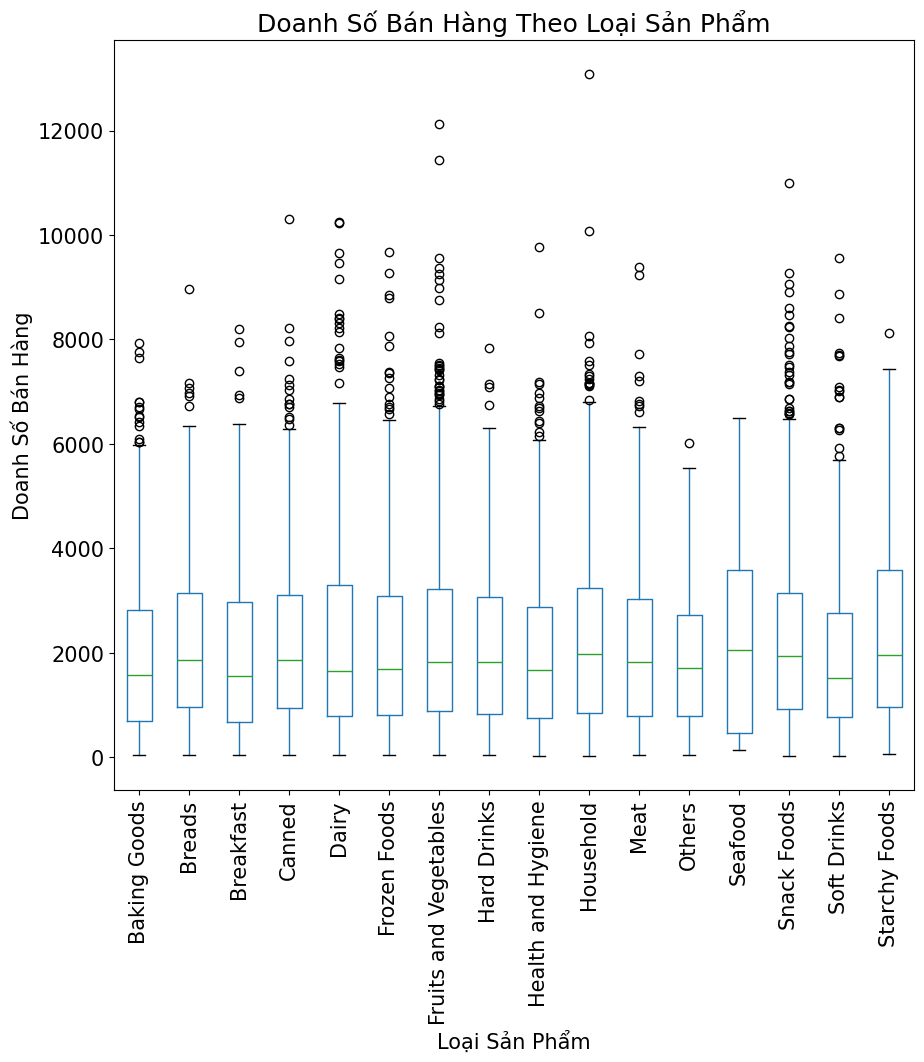

In [20]:
plt.figure(figsize=(12, 8))
mart.boxplot(column='Item_Outlet_Sales', by='Item_Type', grid=False)
plt.title('Doanh Số Bán Hàng Theo Loại Sản Phẩm')
plt.suptitle('')
plt.xlabel('Loại Sản Phẩm')
plt.ylabel('Doanh Số Bán Hàng')
plt.xticks(rotation=90)
plt.show()

##### Giải thích:

- ``mart.boxplot()``: Vẽ biểu đồ box plot để so sánh phân phối doanh số bán hàng theo loại sản phẩm.
- ``plt.xticks(rotation=90)``: Xoay nhãn trên trục x để dễ đọc hơn.

#### 3. Biểu Đồ Scatter Plot Giữa Giá Bán Lẻ Tối Đa Và Doanh Số Bán Hàng (Item MRP vs. Item Outlet Sales)

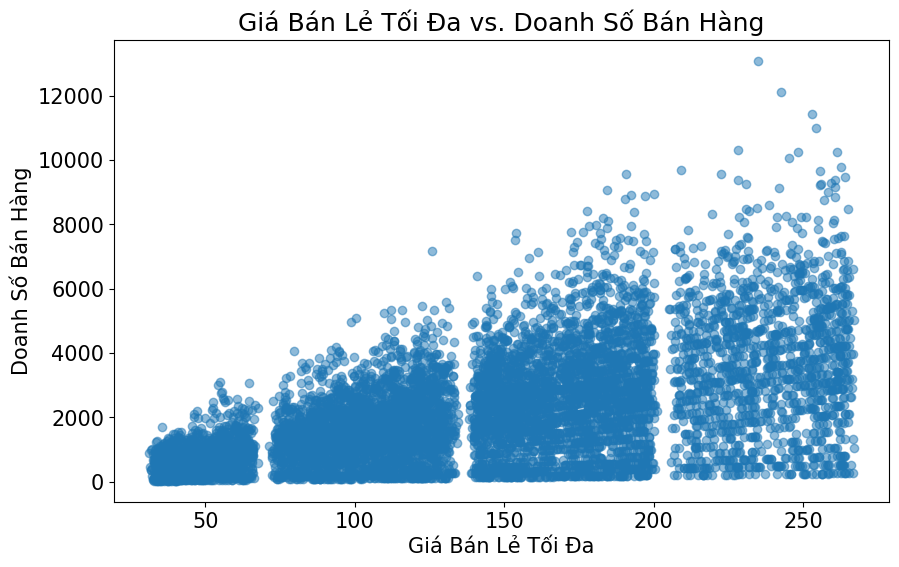

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(mart['Item_MRP'], mart['Item_Outlet_Sales'], alpha=0.5)
plt.title('Giá Bán Lẻ Tối Đa vs. Doanh Số Bán Hàng')
plt.xlabel('Giá Bán Lẻ Tối Đa')
plt.ylabel('Doanh Số Bán Hàng')
plt.show()

##### Giải thích:

- ``plt.scatter()``: Vẽ biểu đồ scatter plot để thể hiện mối quan hệ giữa giá bán lẻ tối đa và doanh số bán hàng.
- ``plt.title()``, ``plt.xlabel()``, ``plt.ylabel()``: Thiết lập tiêu đề và nhãn cho các trục.

#### 4. Biểu Đồ Thanh Cho Số Lượng Cửa Hàng Theo Năm Thành Lập (Number of Outlets by Establishment Year)

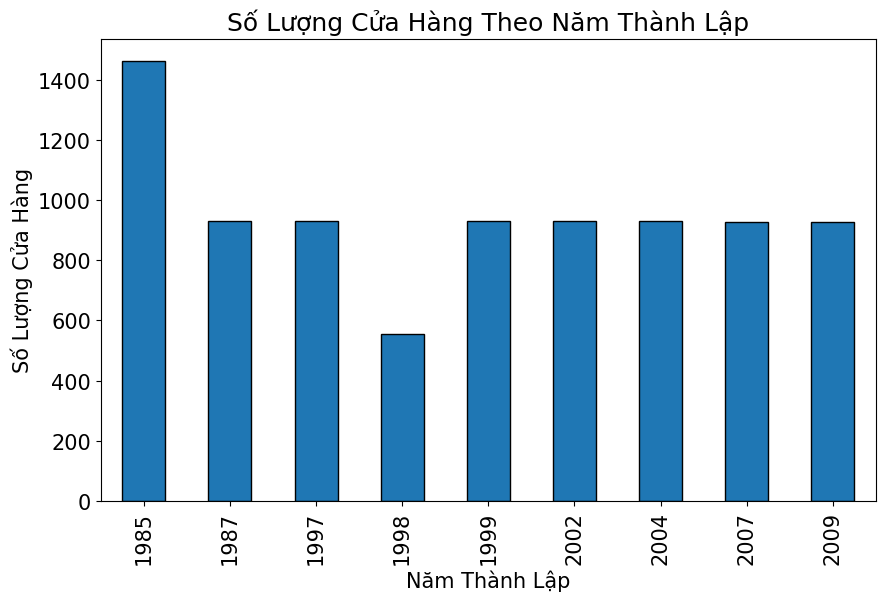

In [22]:
plt.figure(figsize=(10, 6))
mart['Outlet_Establishment_Year'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Số Lượng Cửa Hàng Theo Năm Thành Lập')
plt.xlabel('Năm Thành Lập')
plt.ylabel('Số Lượng Cửa Hàng')
plt.show()

##### Giải thích:

- ``mart['Outlet_Establishment_Year'].value_counts().sort_index().plot(kind='bar')``: Vẽ biểu đồ thanh để đếm số lượng cửa hàng theo năm thành lập, sắp xếp theo thứ tự năm.
- ``plt.title()``, ``plt.xlabel()``, ``plt.ylabel()``: Thiết lập tiêu đề và nhãn cho các trục.

#### 5. Biểu Đồ Tròn (Pie Chart) Cho Loại Cửa Hàng (Outlet Type)

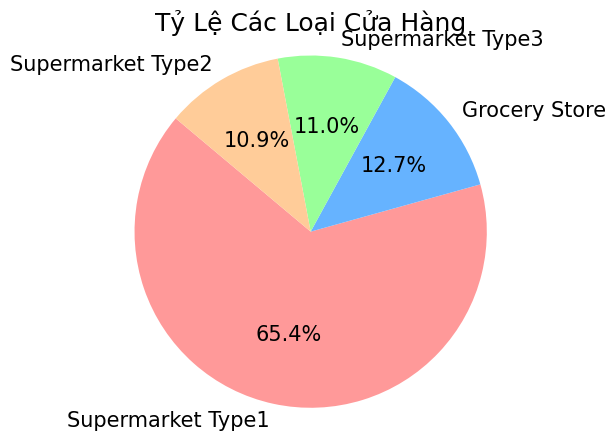

In [23]:
plt.figure(figsize=(5, 5))
outlet_type_counts = mart['Outlet_Type'].value_counts()
plt.pie(outlet_type_counts, labels=outlet_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tỷ Lệ Các Loại Cửa Hàng')
plt.axis('equal')  # Đảm bảo biểu đồ tròn được vẽ dưới dạng hình tròn
plt.show()

##### Giải thích:

- ``plt.pie()``: Vẽ biểu đồ tròn để hiển thị tỷ lệ các loại cửa hàng.
- ``labels=outlet_type_counts.index``: Sử dụng tên loại cửa hàng làm nhãn.
- ``autopct='%1.1f%%'``: Hiển thị tỷ lệ phần trăm với một chữ số thập phân.
- ``startangle=140``: Bắt đầu vẽ biểu đồ từ góc 140 độ để có bố cục đẹp hơn.
- ``plt.axis('equal')``: Đảm bảo biểu đồ tròn được vẽ dưới dạng hình tròn (không bị méo).

## PHÂN TÍCH DỮ LIỆU

> Dữ liệu từ bộ dataset 'Bigmart Sales' bao gồm các ghi chép giao dịch của một cửa hàng bán lẻ, với tổng cộng 8523 dòng và 12 biến. Các biến này bao gồm các thông tin về sản phẩm, cửa hàng, và doanh số bán hàng. Việc phân tích dữ liệu từ dataset này sẽ giúp chúng ta có cái nhìn tổng quan về các yếu tố ảnh hưởng đến doanh số bán hàng và chuẩn bị cho việc dự đoán doanh số bán hàng của cửa hàng.

### Phân tích dữ liệu chuẩn bị cho việc dự đoán doanh số bán hàng của một cửa hàng

Để dự đoán doanh số bán hàng của một cửa hàng, chúng ta cần thực hiện các bước phân tích dữ liệu sau:

1. **Khám phá dữ liệu (Data Exploration):** 
   - Kiểm tra các giá trị bị thiếu và xử lý chúng.
   - Tính toán các thống kê mô tả cơ bản như trung bình, trung vị, và độ lệch chuẩn cho các biến số.
   - Vẽ các biểu đồ phân phối để hiểu rõ hơn về dữ liệu.

2. **Phân tích mối quan hệ (Relationship Analysis):**
   - Sử dụng biểu đồ scatter plot để phân tích mối quan hệ giữa giá bán lẻ tối đa (Item MRP) và doanh số bán hàng (Item Outlet Sales).
   - Sử dụng biểu đồ box plot để so sánh doanh số bán hàng theo loại sản phẩm (Item Type).
   - Sử dụng biểu đồ bar plot để phân tích số lượng cửa hàng theo năm thành lập (Outlet Establishment Year) và loại cửa hàng (Outlet Type).

3. **Chuẩn hóa và biến đổi dữ liệu (Data Transformation and Normalization):**
   - Chuẩn hóa các biến số như Item Visibility để đảm bảo dữ liệu nằm trong khoảng hợp lý.
   - Biến đổi các biến số như Item MRP để giảm thiểu sự ảnh hưởng của các giá trị ngoại lệ.

4. **Tạo các biến số mới (Feature Engineering):**
   - Tạo các biến số mới từ dữ liệu hiện có, ví dụ như tạo biến số tổng hợp từ Item Weight và Item Visibility để tạo ra chỉ số mới thể hiện sự nổi bật của sản phẩm.

### Từ các phân tích với Numpy, Pandas, Matplotlib mang lại lợi ích gì cho một Data Analyst

1. **Numpy:**
   - Giúp thực hiện các phép toán nhanh chóng và hiệu quả trên các mảng dữ liệu lớn.
   - Hỗ trợ tính toán các thống kê mô tả cơ bản và nâng cao.

2. **Pandas:**
   - Cung cấp các công cụ mạnh mẽ để thao tác và xử lý dữ liệu, từ việc đọc, ghi dữ liệu đến việc xử lý các giá trị bị thiếu, lọc dữ liệu, và nhóm dữ liệu.
   - Giúp dễ dàng khám phá và phân tích dữ liệu với các phương thức tiện lợi.

3. **Matplotlib:**
   - Giúp trực quan hóa dữ liệu một cách sinh động và dễ hiểu thông qua các biểu đồ đa dạng.
   - Hỗ trợ tạo các biểu đồ tùy chỉnh để phù hợp với các nhu cầu phân tích khác nhau.

### Tầm quan trọng của phân tích dữ liệu

Phân tích dữ liệu là một bước quan trọng trong quá trình ra quyết định dựa trên dữ liệu. Đối với một Data Analyst, việc phân tích dữ liệu mang lại những lợi ích sau:

1. **Hiểu rõ hơn về dữ liệu:**
   - Giúp khám phá và hiểu rõ các đặc điểm của dữ liệu, từ đó phát hiện ra các vấn đề và cơ hội tiềm năng.

2. **Xác định các yếu tố ảnh hưởng:**
   - Giúp xác định các yếu tố chính ảnh hưởng đến doanh số bán hàng, từ đó đưa ra các quyết định kinh doanh hợp lý và hiệu quả.

3. **Dự đoán và tối ưu hóa:**
   - Giúp chuẩn bị dữ liệu cho các mô hình dự đoán, từ đó dự đoán chính xác doanh số bán hàng và tối ưu hóa các chiến lược kinh doanh.

4. **Ra quyết định dựa trên dữ liệu:**
   - Cung cấp cơ sở khoa học cho việc ra quyết định, giảm thiểu rủi ro và tăng cường hiệu quả kinh doanh.

5. **Nâng cao kỹ năng và hiệu suất làm việc:**
   - Giúp Data Analyst nâng cao kỹ năng phân tích và trực quan hóa dữ liệu, từ đó cải thiện hiệu suất làm việc và đóng góp tích cực vào sự phát triển của tổ chức.

Qua việc áp dụng các công cụ và kỹ thuật phân tích dữ liệu, chúng ta có thể tối ưu hóa quy trình kinh doanh, dự đoán chính xác doanh số bán hàng và đưa ra các quyết định kinh doanh hiệu quả, góp phần vào sự thành công của cửa hàng và tổ chức.
